## fully connected neural network

### generate data from function

In [1]:
import numpy as np

# function: y = x1^3 + 5*x1^2 - 0.1*x1^6 + 45*sin(5*x1) + 6

def f(x: np.ndarray) -> np.ndarray:
    """
    Function to compute the value of the polynomial y = x1^3 + 5*x1^2 - 0.1*x1^6 + 45*sin(5*x1) + 6.
    """
    return x**3 + 5*x**2 - 0.1*x**6 + 45*np.sin(5*x) + 6

# test the function
print(f"{f(np.array([3]))=}")

f(np.array([3]))=array([34.36295281])


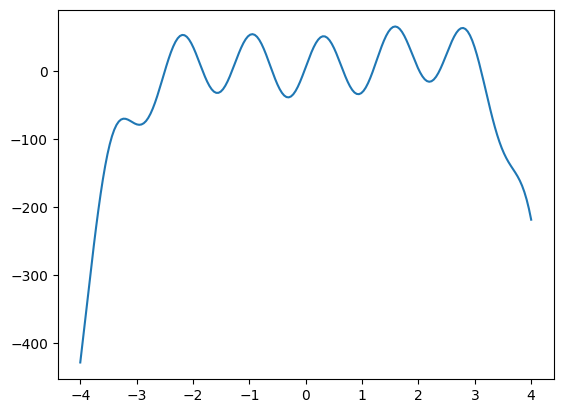

In [2]:
# plot the function
import matplotlib.pyplot as plt

X1 = np.linspace(-4, 4, 200)
Y = f(X1)
plt.plot(X1, Y)

In [4]:
def f_plus_error(x: np.ndarray, err_scale: float) -> np.ndarray:
    """
    Function to compute the value of the polynomial y = x1^3 + 5*x1^2 - 0.1*x1^6 + 45*sin(5*x1) + 6
    with a small error added.
    """
    return f(x) + np.random.normal(0, err_scale, size=x.shape)

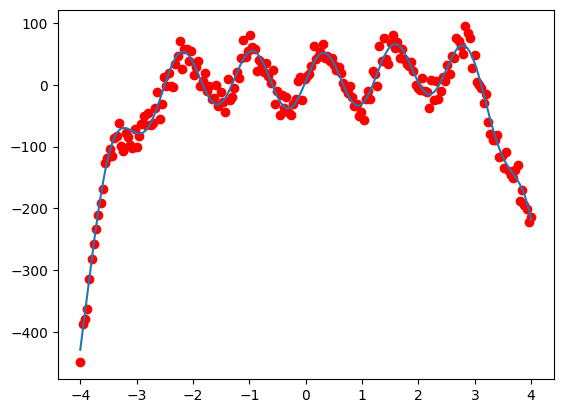

In [5]:
# plot the function plus data points with error
X1 = np.linspace(-4, 4, 200)
Y = f(X1)
Yerr = f_plus_error(X1, 15)

plt.plot(X1, Y)
plt.scatter(X1, Yerr, color='red')

## build the neural network
<img src="neuralnetwork.png" alt="neuralnetwork" width="300"/>

<img src="hidden_layer_math.png" alt="neuralnetwork" width="400"/>

In [7]:
def generate_random_matrix(n: int, m: int) -> np.ndarray:
    """
    Function to generate a random matrix of shape (n, m) with values between -1 and 1.
    """
    return np.random.uniform(-1, 1, size=(n, m))

# test the function
print(f"{generate_random_matrix(3, 4)=}")

generate_random_matrix(3, 4)=array([[ 0.08711543, -0.9127386 , -0.42532822,  0.69894883],
       [-0.59286097, -0.27131247, -0.46841005, -0.21554633],
       [-0.77867061, -0.01274098,  0.29034693, -0.10403156]])


In [8]:
def generate_neural_network_weights(input_size: int, hidden_size: int, output_size: int) -> tuple:
    """
    Function to generate random weights for a neural network with one hidden layer.
    The weights are initialized randomly between -1 and 1.
    """
    weights_hidden = generate_random_matrix(hidden_size, input_size)
    bias_hidden = np.random.uniform(-1, 1, size=(hidden_size,))
    weights_output = generate_random_matrix(output_size, hidden_size)
    bias_output = np.random.uniform(-1, 1, size=(output_size,))
    return weights_hidden, bias_hidden, weights_output, bias_output

# test the function
weights_hidden, bias_hidden, weights_output, bias_output = generate_neural_network_weights(1, 5, 1)
print(f"{weights_hidden=}")
print(f"{bias_hidden=}")
print(f"{weights_output=}")
print(f"{bias_output=}")

weights_hidden=array([[ 0.49527838],
       [-0.27870878],
       [ 0.73229599],
       [ 0.8205795 ],
       [-0.16300101]])
bias_hidden=array([-0.73330948,  0.25177706,  0.16052619, -0.99464461, -0.05633184])
weights_output=array([[ 0.23056549,  0.21564924, -0.85313686,  0.45711254, -0.06515956]])
bias_output=array([-0.65847431])


In [10]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    """
    Sigmoid activation function.
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x: np.ndarray) -> np.ndarray:
    """
    Derivative of the sigmoid function.
    """
    return sigmoid(x) * (1 - sigmoid(x))

# test the sigmoid function
x = np.array([-1, 0, 1])
print(f"{sigmoid(x)=}")
print(f"{sigmoid_derivative(x)=}")

sigmoid(x)=array([0.26894142, 0.5       , 0.73105858])
sigmoid_derivative(x)=array([0.19661193, 0.25      , 0.19661193])


In [17]:
def forward_pass(x: np.ndarray, weights_hidden: np.ndarray, bias_hidden: np.ndarray,
               weights_output: np.ndarray, bias_output: np.ndarray) -> np.ndarray:
    """
    Forward pass through the neural network.
    """
    z = weights_hidden @ x + bias_hidden
    a = sigmoid(z)
    output = weights_output @ a + bias_output
    return z, a, output

# test the forward pass
x = np.array([1])
weights_hidden, bias_hidden, weights_output, bias_output = generate_neural_network_weights(1, 5, 1)
z, a, output = forward_pass(x, weights_hidden, bias_hidden, weights_output, bias_output)
print(f"{z=}")
print(f"{a=}")
print(f"{output=}")

z=array([-0.58228572,  0.76361965,  0.53737888, -0.45423832, -1.08004016])
a=array([0.35840682, 0.68213908, 0.63120247, 0.38835354, 0.25349842])
output=array([-0.17581998])


In [20]:
def loss_function(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Mean Squared Error loss function.
    """
    return np.mean(((y_true - y_pred) ** 2)/2)

# test the loss function
y_true = np.array([1])
y_pred = np.array([0.5])
print(f"{loss_function(y_true, y_pred)=}")

loss_function(y_true, y_pred)=np.float64(0.125)


In [26]:
def backpropagation(x: np.ndarray, y_true: np.ndarray, weights_hidden: np.ndarray, bias_hidden: np.ndarray,
                     weights_output: np.ndarray, bias_output: np.ndarray, learning_rate: float) -> tuple:
    """
    Backpropagation algorithm to update the weights and biases of the neural network.
    """
    # Forward pass
    z, a, output = forward_pass(x, weights_hidden, bias_hidden, weights_output, bias_output)

    # Compute loss
    loss = loss_function(y_true, output)

    # Compute gradients
    d_loss = (output - y_true)
    d_weights_output = np.outer(d_loss, a)
    d_bias_output = d_loss

    d_a = weights_output.T @ d_loss
    d_z = d_a * sigmoid_derivative(z)
    d_weights_hidden = np.outer(d_z, x)
    d_bias_hidden = d_z

    # Update weights and biases
    weights_output -= learning_rate * d_weights_output
    bias_output -= learning_rate * d_bias_output
    weights_hidden -= learning_rate * d_weights_hidden
    bias_hidden -= learning_rate * d_bias_hidden

    return weights_hidden, bias_hidden, weights_output, bias_output, loss

# test the backpropagation
x = np.array([1])
y_true = np.array([1])
weights_hidden, bias_hidden, weights_output, bias_output = generate_neural_network_weights(1, 5, 1)
learning_rate = 0.01
weights_hidden, bias_hidden, weights_output, bias_output, loss = backpropagation(
    x, y_true, weights_hidden, bias_hidden, weights_output, bias_output, learning_rate
)
print(f"{weights_hidden=}")
print(f"{bias_hidden=}")
print(f"{weights_output=}")
print(f"{bias_output=}")
print(f"{loss=}")

weights_hidden=array([[-0.84696424],
       [-0.0860062 ],
       [ 0.35438311],
       [-0.11660259],
       [ 0.36405365]])
bias_hidden=array([-0.35256216,  0.82968325, -0.29269171, -0.29553042, -0.9199996 ])
weights_output=array([[0.72626346, 0.71771772, 0.76694143, 0.00174482, 0.57949919]])
bias_output=array([0.59787881])
loss=np.float64(0.38690139629928627)


In [54]:
def train_neural_network(X: np.ndarray, Y: np.ndarray, weights_hidden: np.ndarray,
                   bias_hidden: np.ndarray, weights_output: np.ndarray, bias_output: np.ndarray,
                   learning_rate: float, epochs: int) -> tuple:
    """
    Train the neural network using backpropagation.
    """
    num_samples = X.shape[0]
    for epoch in range(epochs):
        total_loss = 0
        for x, y_true in zip(X, Y):
            weights_hidden, bias_hidden, weights_output, bias_output, loss = backpropagation(
                x, y_true, weights_hidden, bias_hidden, weights_output, bias_output, learning_rate
            )
            total_loss += loss
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {total_loss/num_samples}")
    return weights_hidden, bias_hidden, weights_output, bias_output

In [58]:
# train a neural network
X = np.linspace(-4, 4, 1000).reshape(-1, 1)
Y = f_plus_error(X, 15).reshape(-1, 1)
weights_hidden, bias_hidden, weights_output, bias_output = generate_neural_network_weights(1, 100, 1)
learning_rate = 0.0001
epochs = 4000
weights_hidden, bias_hidden, weights_output, bias_output = train_neural_network(
    X, Y, weights_hidden, bias_hidden, weights_output, bias_output, learning_rate, epochs
)

Epoch 0, Loss: 3456.9701543624537
Epoch 10, Loss: 2230.5125274228494
Epoch 20, Loss: 1326.6960945238275
Epoch 30, Loss: 1073.4773900252185
Epoch 40, Loss: 953.6695348098254
Epoch 50, Loss: 870.3994708944326
Epoch 60, Loss: 807.0201980345488
Epoch 70, Loss: 758.9058826370463
Epoch 80, Loss: 722.0093363493638
Epoch 90, Loss: 683.1697357649141
Epoch 100, Loss: 650.9161618546506
Epoch 110, Loss: 623.0622375665512
Epoch 120, Loss: 600.5642738209095
Epoch 130, Loss: 582.0934701075463
Epoch 140, Loss: 567.323779699024
Epoch 150, Loss: 555.080615800941
Epoch 160, Loss: 544.5691395868938
Epoch 170, Loss: 535.6091984298074
Epoch 180, Loss: 528.0291285148184
Epoch 190, Loss: 521.406860852809
Epoch 200, Loss: 515.4604290055937
Epoch 210, Loss: 510.0274267494123
Epoch 220, Loss: 505.0275676652437
Epoch 230, Loss: 500.4287713866614
Epoch 240, Loss: 496.2080581044754
Epoch 250, Loss: 492.25986809255306
Epoch 260, Loss: 488.41873049586775
Epoch 270, Loss: 484.6401575311677
Epoch 280, Loss: 480.9017439

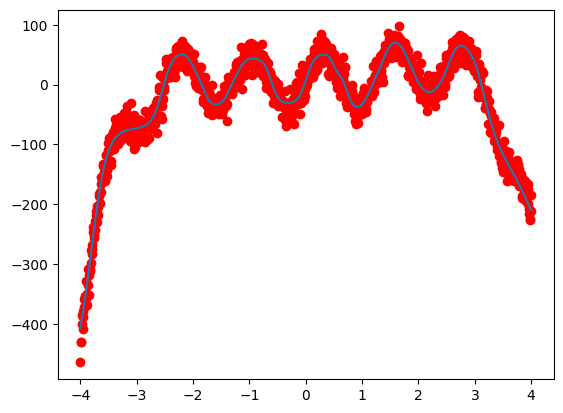

In [59]:
# plot the results
y = [forward_pass(x, weights_hidden, bias_hidden, weights_output, bias_output)[2] for x in X]
plt.plot(X, y, label='NN Prediction')
plt.scatter(X, Y, color='red', label='Data with Error')

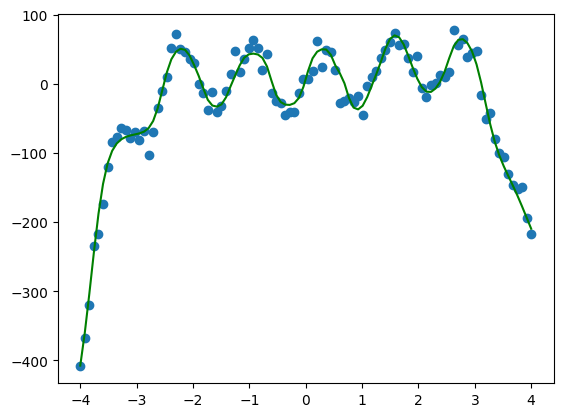

In [60]:
# predictions
X_test = np.linspace(-4, 4, 100).reshape(-1, 1)
Y_test = f_plus_error(X_test, 15).reshape(-1, 1)
Y_pred = [forward_pass(x, weights_hidden, bias_hidden, weights_output, bias_output)[2] for x in X_test]

plt.scatter(X_test, Y_test, label='Test Data with Error')
plt.plot(X_test, Y_pred, color='green', label='NN Prediction on Test Data')